In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', size=12)
plt.rc('axes', labelsize=12)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import gglngram as gn
import sqlite3 as sq

In [4]:
databasePath = 'data/database-c.sqlite'

In [5]:
dbconnection = sq.connect(databasePath)
cursor = dbconnection.cursor()

In [6]:
# Get sorted ngrams  by total counts
getTopNgram = """SELECT * from countngram
                 ORDER BY matchcount DESC"""

cursor.execute( getTopNgram )

rows = cursor.fetchall()
for row in rows[:10]:
    print(row)

('ce', 368216698, 769114)
('ce_DET', 223873345, 768564)
('cette', 214785748, 767827)
('cette_DET', 214785748, 767827)
('comme', 201013050, 767738)
('ces', 174183859, 767094)
('ces_DET', 173939003, 767088)
('comme_ADP', 152770302, 767007)
('ce_PRON', 144272707, 766239)
("c'est", 109613413, 761279)


In [7]:
# filter out _
rows = [ row for row in rows if '_' not in row[0] ]

In [8]:
print( len(rows) )

322155


In [19]:
def getZscore( years, counts ):
    iMax = np.argmax( counts )
    vMax = counts[ iMax ]
    zScore = (vMax - counts.mean())/counts.std()
    return years[ iMax ], zScore #* np.sqrt(counts.mean())

def getCumulScore( y, c ):
    cm = c.mean()
    cumul = np.cumsum( np.cumsum( (c - cm) ) )

    iMax = np.argmax( cumul )

    return y[ iMax ], cumul[iMax]

def getScore(y, c):
    ''' 
    '''

    return ( c[0] - c[-1] )/c[-1]
    return score

In [20]:
results = []
i = 0
for ng, c, ngs in rows[:9000]:
    score = getScore( *gn.getCountPerYear( cursor, ng, k=3, volume=False, normed=True ) )
    
    results.append( (ng, score)  )
        
    i = i+1
    if i%50==0:
        print( '\r %i'%i, end='' )

 8850

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


 9000

In [23]:
getTop5 = lambda l: ', '.join([ x[0] for x in sorted( l, key=lambda x:x[1], reverse=True )[:5] ])

In [26]:
sortedResults = sorted( results, key=lambda x:x[1], reverse=True )[:60]
sortedResults

[('contractans', 567.76745281455555),
 ('correspondans', 507.31720840498843),
 ('courans', 477.3474004429217),
 ('conquérans', 409.82761382035153),
 ('commerçans', 408.72125595994203),
 ('chûte', 405.36696715735627),
 ('compétens', 377.03727123185894),
 ('colléges', 328.54289993750831),
 ('concurrens', 293.97573626333309),
 ('connoît', 237.37923476043844),
 ('combattans', 227.92968832391043),
 ('comptoit', 226.59358800841292),
 ('connoissoient', 217.75496626208928),
 ('commandoit', 215.79156884101752),
 ("C'étoit", 214.83520218163187),
 ('châtimens', 213.28269879738249),
 ('commandans', 213.05016402585241),
 ('complette', 211.10470207110964),
 ('celluleux', 205.9144492125842),
 ('connoissoit', 203.82165658576534),
 ('collége', 200.61370278612978),
 ("c'étoit", 188.30573899201744),
 ('changemens', 188.08134166405819),
 ('celluleuse', 182.41297243161569),
 ('Chrysostôme', 180.66368507747819),
 ('conduisoit', 173.6755945486083),
 ('commettans', 171.51383080187293),
 ('contenoit', 161.6324

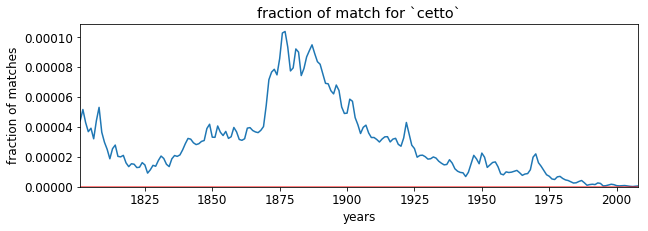

In [32]:
gn.plot( cursor, "cetto", k=3, volume=False, normed=True )

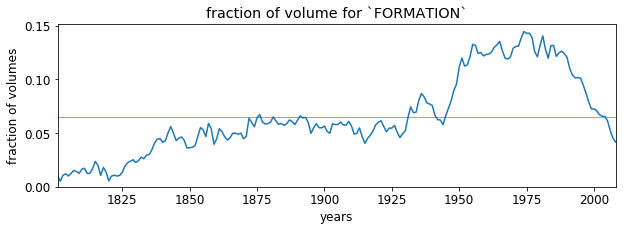

In [102]:
gn.plot( cursor, "FORMATION", k=3, volume=True, normed=True )

In [71]:
getScore( *gn.getCountPerYear( cursor, 'fonctionnelle', k=3, volume=True, normed=True ) )

(1846, 0.0026611465175493732)